Classification means that dependent on the input it might be 1, 2 or 3 as result and the solution is given as percentage factor.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [2]:
model = ks.Sequential()
model.add(ks.layers.Input(shape=(224, 224, 3)))
model.add(ks.layers.Dense(64, activation='relu'))
model.add(ks.layers.Dense(3, activation='softmax'))

model.compile(optimizer=ks.optimizers.Adam(), loss=ks.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, factor=0.42)

In [4]:
x[:10]

array([[ 0.77892419, -0.6261435 ],
       [-0.01988638, -0.39972405],
       [-0.25754309, -0.34523113],
       [-0.32834574,  0.29857872],
       [-0.6279785 ,  0.73437007],
       [-0.34367741, -0.18007683],
       [-0.08886529, -0.40713156],
       [ 0.79526587, -0.6030313 ],
       [-0.96518398,  0.4073223 ],
       [-0.05737553,  0.46989231]])

In [5]:
y[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

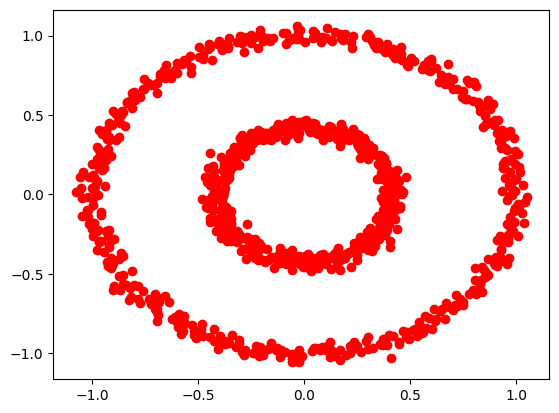

In [7]:
for i in x:
    plt.scatter(i[0], i[1], color='red')

plt.show()

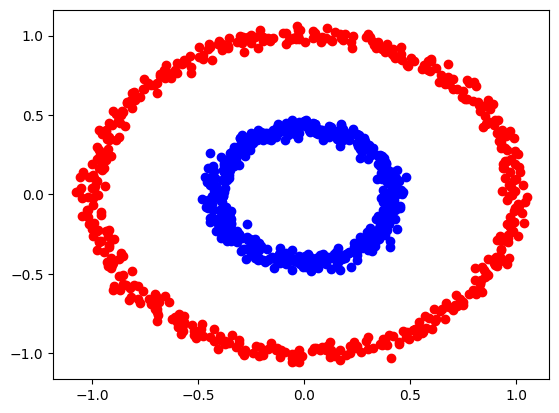

In [8]:
#show only dots with y=0 and y=1 in different colors
for i in range(len(x)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1], color='red')
    else:
        plt.scatter(x[i][0], x[i][1], color='blue')

So we see that y is 0 when the data represents the outer circle and 1 when the data represents the inner circle.

My idea now is, because we have a function which is not linear, we can either split the data into parts in order to make it linear or we can ... idk.


In [9]:
circles = pd.DataFrame({'X0': x[:, 0], 'X1': x[:, 1], 'label': y})
# plot.scatter(x='X0', y='X1', c='Y', colormap='viridis')
circles

,X0,X1,label
0,0.778924,-0.626144,0
1,-0.019886,-0.399724,1
2,-0.257543,-0.345231,1
3,-0.328346,0.298579,1
4,-0.627979,0.734370,0
...,...,...,...
995,-0.959497,-0.290142,0
996,0.924612,-0.260236,0
997,0.090065,0.374659,1
998,0.642961,-0.735677,0


In [10]:
x.shape, y.shape

((1000, 2), (1000,))

In [11]:
#example input and output
x[0], y[0]

(array([ 0.77892419, -0.6261435 ]), 0)

In [12]:
x[0].shape, y[0].shape

((2,), ())

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [15]:
ct = make_column_transformer(
    (MinMaxScaler(), ['X0', 'X1', 'children']),
)

x = circles[['X0', 'X1']]
py = circles.drop(['X0', 'X1'], axis=1, inplace=False)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train